In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
spotify_data = pd.read_csv(r"/content/Spotify_data.csv")

In [3]:
spotify_data.sample(5)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
120,120,"Raataan Lambiyan (From ""Shershaah"")","Tanishk Bagchi, Jubin Nautiyal, Asees Kaur","Raataan Lambiyan (From ""Shershaah"")",2DKSZvMj7Da6rzNVPMgREj,2rOnSn2piaqLAlYjtfUBlY,70,2021-07-30,230292,False,...,0.630,10,-5.549,1,0.0413,0.6150,0.0000,0.108,0.512,81.009
63,63,Nonstop,Drake,Scorpion,1ATL5GLyefJaxhQzSPVrLX,0TlLq3lA83rQOYtrqBqSct,75,2018-06-29,238614,True,...,0.412,7,-8.074,1,0.1230,0.0165,0.0126,0.104,0.423,154.983
37,37,Rich Baby Daddy (feat. Sexyy Red & SZA),"Drake, Sexyy Red, SZA",For All The Dogs,4czdORdCWP9umpbhFXK2fW,1yeB8MUNeLo9Ek1UEpsyz6,82,2023-10-06,319192,True,...,0.729,2,-4.495,1,0.0550,0.0458,0.0000,0.384,0.141,146.009
67,67,Rainfall (Praise You),Tom Santa,Rainfall (Praise You),4VanY5i4E59Mhz52qznJ95,1M8t1j3Kv2qp97bdq5q4Vl,74,2022-02-18,166570,False,...,0.862,5,-5.464,0,0.0606,0.1400,0.0092,0.252,0.509,128.039
184,184,Raataan Lambiyan,"Tanishk Bagchi, Jubin Nautiyal, Asees Kaur",Shershaah (Original Motion Picture Soundtrack),5BLwx5IlfoWOrjJJ3i7gbK,1stiSonuKkZqhI1o9nZ9MT,63,2021-08-16,230292,False,...,0.628,10,-5.546,1,0.0409,0.6100,0.0000,0.108,0.514,81.008


In [4]:
# Drop unnessary columns

data = spotify_data.drop(columns = ['Unnamed: 0'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

# EDA

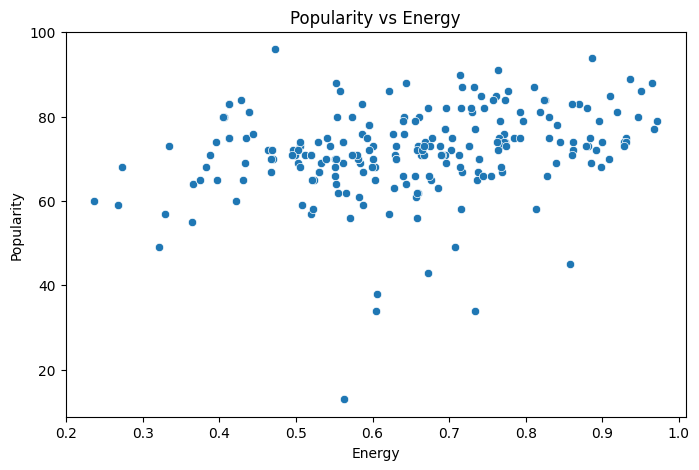

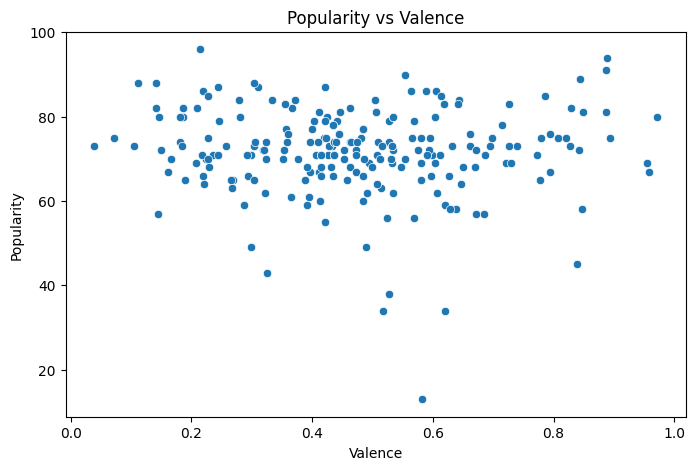

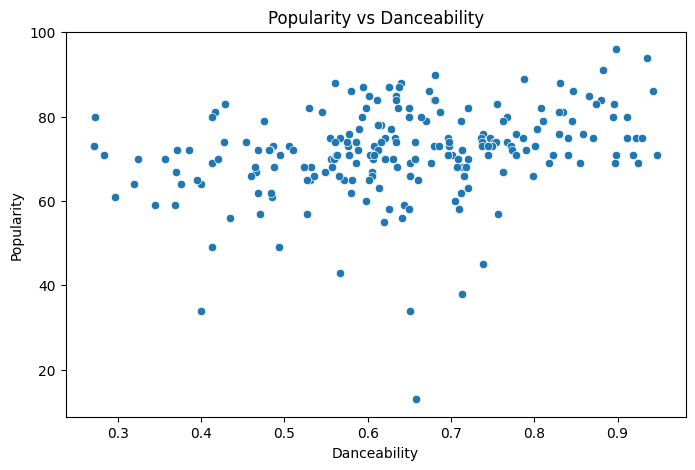

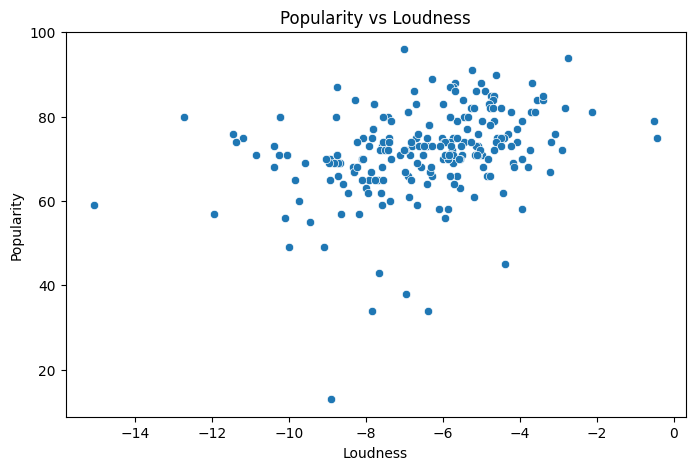

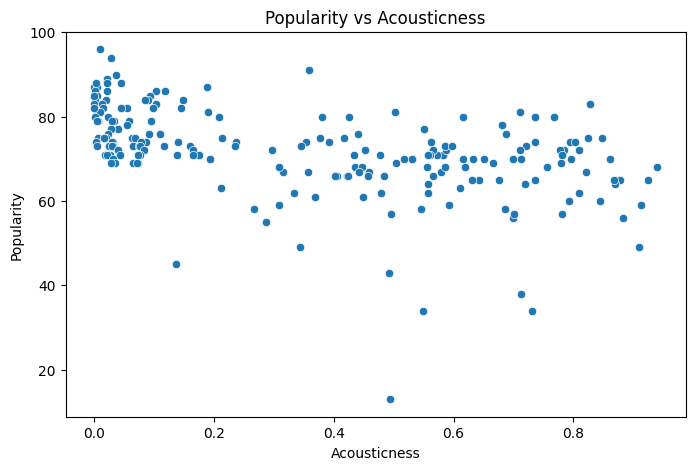

In [6]:
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']

for feature in features:
    plt.figure(figsize = (8,5))
    sns.scatterplot(data = data, x = feature, y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

In [8]:
# correlation between all the features

numeric_col = data.select_dtypes(include = ['int64', 'float64']).columns
numeric_data = data[numeric_col]


In [9]:
numeric_data

,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,96,274192,0.898,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,94,227239,0.936,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,91,140733,0.882,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,90,149668,0.681,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,89,144846,0.788,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,66,272680,0.565,0.744,7,-5.817,1,0.0446,0.4030,0.000000,0.0853,0.415,134.068
223,58,309103,0.626,0.522,7,-5.857,1,0.0317,0.6860,0.000000,0.4100,0.628,118.001
224,62,281992,0.484,0.565,11,-7.954,1,0.0347,0.4790,0.000002,0.1050,0.607,82.653
225,65,305232,0.602,0.374,10,-9.849,0,0.0328,0.9240,0.000008,0.0840,0.388,101.855


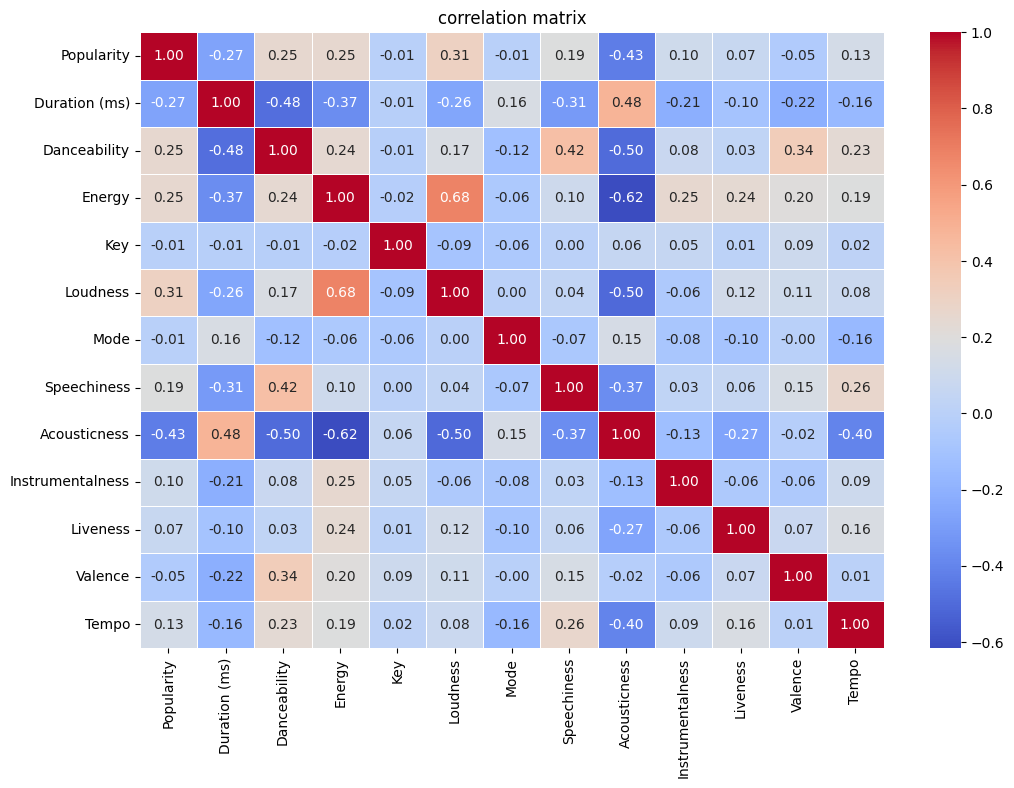

In [10]:
corr_matrix = numeric_data.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title("correlation matrix")
plt.show()

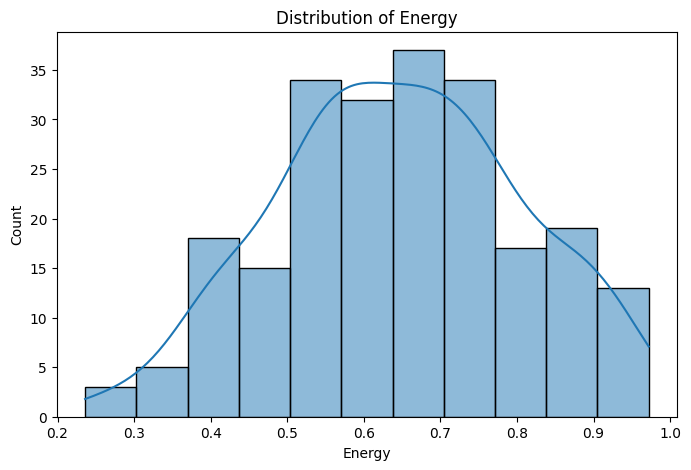

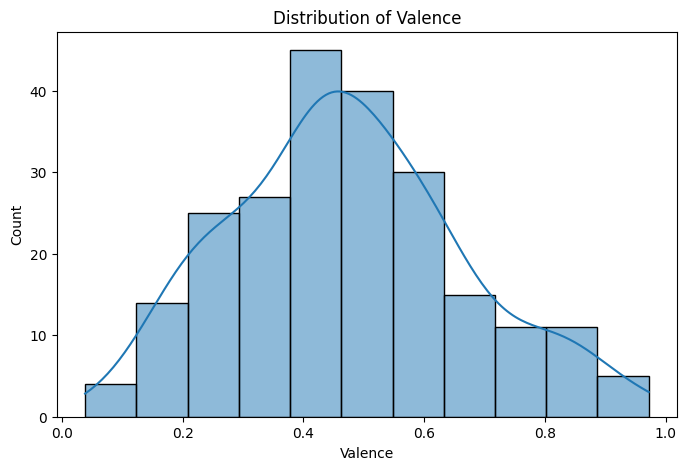

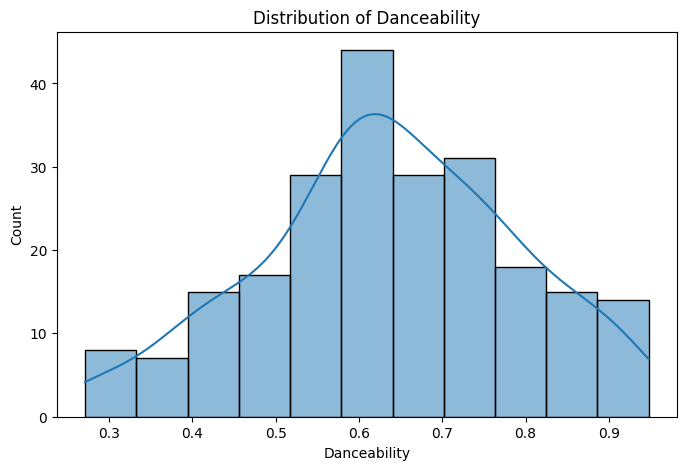

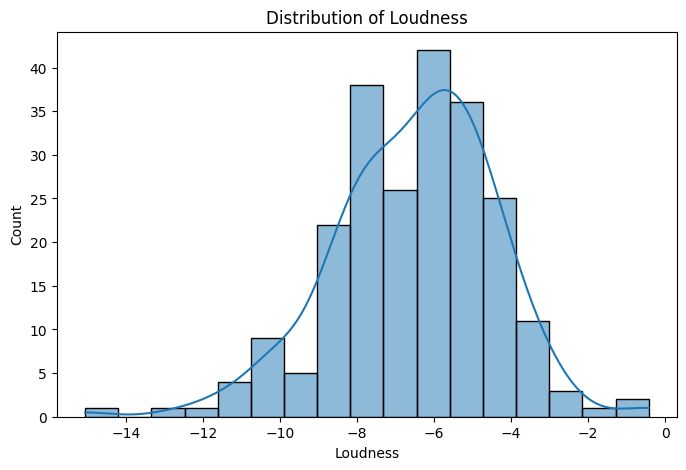

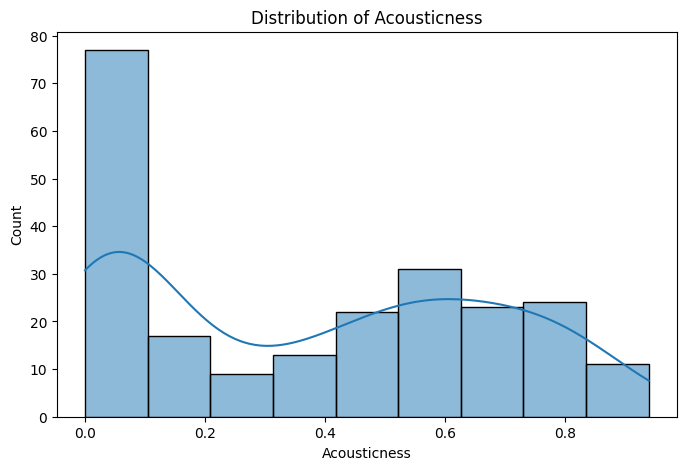

In [11]:
for feature in features:
    plt.figure(figsize = (8,5))
    sns.histplot(data[feature], kde = True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [12]:
# fetaure selection and Model Training

print(features)

['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']


In [15]:
imp_features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']

x = data[imp_features]
y = data['Popularity']

Index(['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness',
       'Tempo', 'Speechiness', 'Liveness'],
      dtype='object')

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [24]:
param_grid = {
    'n_estimators' : [50, 100, 200],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

In [28]:
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid, refit = True, verbose= 2, cv =5)

grid_search_cv.fit(x_train_scaled, y_train)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [29]:
best_params_rf = grid_search_cv.best_params_
best_rf_model = grid_search_cv.best_estimator_


In [32]:
y_pred_best_rf = best_rf_model.predict(x_test_scaled)

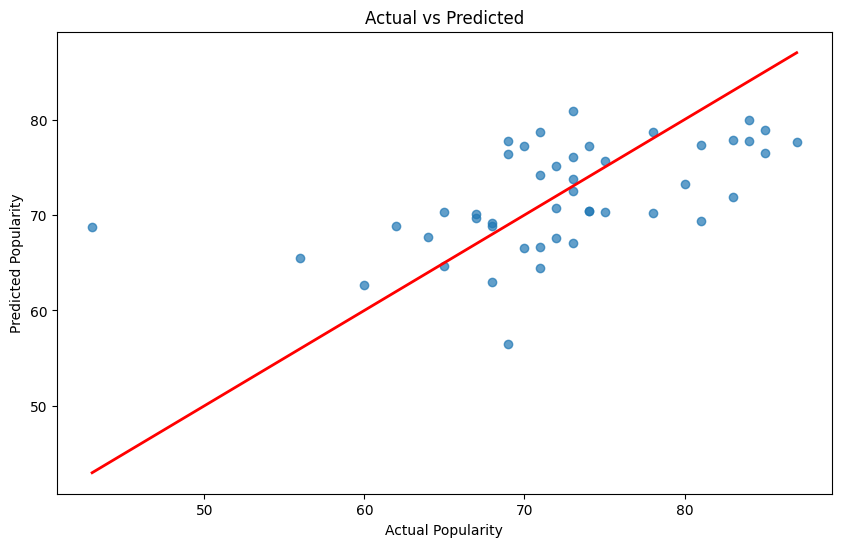

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha = 0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth = 2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted')
plt.show()